# Python для визуализации данных

*Рогович Татьяна, ВШЭ*

## Упражнения

Первые три задания работаем с набором данных, который содержит всех новорожденных и их имена в CША. Последние два задания делаем на уже известном вам датасете про индийских женщин и диабет.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

babies = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/babies%20names/babies_all.txt')
pima = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')


In [2]:
babies.tail()

,Unnamed: 0,name,sex,number,year
1690779,33833,Zymaire,M,5,2010
1690780,33834,Zyonne,M,5,2010
1690781,33835,Zyquarius,M,5,2010
1690782,33836,Zyran,M,5,2010
1690783,33837,Zzyzx,M,5,2010


In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Задание 1.
Исследуйте набор данных babies. Ответьте на вопросы.

1) Какие годы включает датасет


In [5]:
babies.year.value_counts()

2008    35006
2007    34883
2009    34602
2006    34039
2010    33838
        ...  
1885     2294
1882     2127
1883     2084
1880     2000
1881     1935
Name: year, Length: 131, dtype: int64

C 1881 по 2008 год 

2) Какое имя в датасете находится по индексом 121?

In [13]:
babies.name[121]

'Ann'

3) Cколько всего родилось детей по имени 'Aaron' за все время?



In [180]:
babies.name[babies['name'] == 'Aaron'].count()

212

4) Насколько больше за все время родилось мальчиков чем девочек?

In [38]:
man = babies.sex[babies['sex'] == 'M'].count()
woman = babies.sex[babies['sex'] == 'F'].count()
#print(man, woman)
man - woman

-317186

Вообще-то мальчиков, конечно, меньше

5) Cколько мальчиков родилось в 2010?

In [43]:
babies[(babies['sex'] == 'M') & (babies['year'] == 2010)]

,Unnamed: 0,name,sex,number,year
1676644,19698,Jacob,M,21875,2010
1676645,19699,Ethan,M,17866,2010
1676646,19700,Michael,M,17133,2010
1676647,19701,Jayden,M,17030,2010
1676648,19702,William,M,16870,2010
...,...,...,...,...,...
1690779,33833,Zymaire,M,5,2010
1690780,33834,Zyonne,M,5,2010
1690781,33835,Zyquarius,M,5,2010
1690782,33836,Zyran,M,5,2010


14 140 парней

6) Сколько в датасете девочек по имени John?

In [45]:
babies[(babies['sex'] == 'F') & (babies['name'] == 'John')].count()

Unnamed: 0    131
name          131
sex           131
number        131
year          131
dtype: int64

131 девочку назвали в честь Леннона )

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: babies_girls и babies_boys.
2. Создайте фигуру matplotlib с 3 графиками один под другим.
3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y. 
4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.
5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут .index


In [175]:
babies_girls = babies[babies['sex'] == 'F'].drop(['Unnamed: 0'], axis = 1).groupby(['year']).agg('sum')
babies_boys = babies[babies['sex'] == 'M'].drop(['Unnamed: 0'], axis = 1).groupby(['year']).agg('sum')
babies_girls.head()

,number
year,
1880,90993
1881,91955
1882,107851
1883,112322
1884,129021


In [179]:
# plt.plot(babies_girls.index, babies_girls.number, c='red')
# plt.plot(babies_boys.index, babies_boys.number, c='blue')

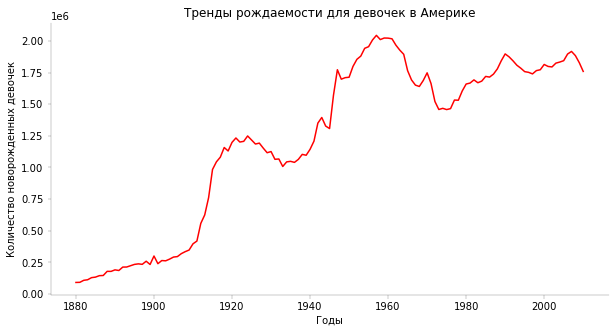

In [185]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(babies_girls.index, babies_girls.number, c='red')
ax.set_title('Тренды рождаемости для девочек в Америке')
ax.set_xlabel('Годы', fontsize=10)
ax.set_ylabel('Количество новорожденных девочек', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)

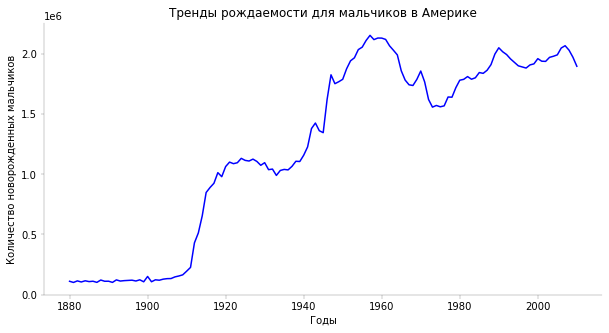

In [186]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(babies_boys.index, babies_boys.number, c='blue')
ax.set_title('Тренды рождаемости для мальчиков в Америке')
ax.set_xlabel('Годы', fontsize=10)
ax.set_ylabel('Количество новорожденных мальчиков', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)

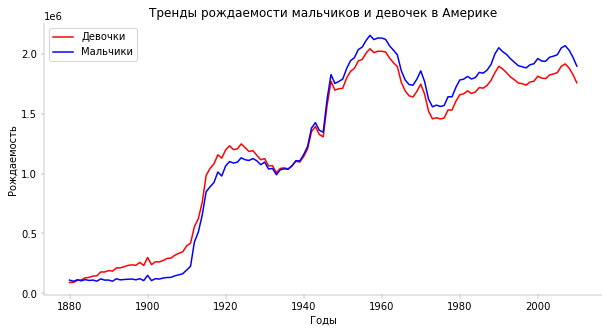

In [184]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.locator_params(integer=True)
ax.plot(babies_girls.index, babies_girls.number, c='red')
ax.plot(babies_boys.index, babies_boys.number, c='blue')
ax.set_title('Тренды рождаемости мальчиков и девочек в Америке')
ax.set_xlabel('Годы', fontsize=10)
ax.set_ylabel('Рождаемость', fontsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)
ax.legend(["Девочки", "Мальчики"])

В целом тренды рождаемости мальчиков и девочек в Америке очень коррелируют друг с другом. К концу анализируемого периода (2008 год), мальчиков стало рождаться больше, чем девочек, в то время как в 1880 году была обратная ситуация.

На графиках отчетливо виден спад рождаемости детей в годы Великой депрессии, при этом перелом данной негативной для страны тенденции случается в годы Второй Мировой войны. Не является большим открытием тот факт, что в годы Второй Мировой экономическая ситуация в Америке резко улучшилась, что связано с удаленностью от мест основных боевых действий и активизацией производственно-торговых отношений с воюющими сторонами. Частный бизнес не стал исключением, он активно переводил бизнес на конверсионные рельсы, что повлекло за собой рост доходов значительной части американского населения, что явилось причиной роста рождаемости.

Пик рождаемости пришёлся на 1950-1970, после чего пошла тенденция снижения, что является обычным и широко-известным в демографии явлением (по мере достижения некоего критического уровня роста доходов, медицины и образования, рождаемость начинает снижаться: женщины больше времени уделяют себе (образованию, бизнесу и пр.), рожать много перестаёт быть выгодной стратегией, ввиду значительной выживаемости и повышению качества собственной жизни.

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).
2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.
3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.
4. Постройте 4 линейных графика - тренд для каждого имени за все время.
5. Верхняя и правая границы графиков должны быть невидимы, каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.
6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.
7. Опишите тренды в ячейке markdown под графиками.



In [9]:
babies.head()

Unnamed: 0    1690784
name          1690784
sex           1690784
number        1690784
year          1690784
dtype: int64

In [193]:
babies_girls_new = babies[babies['sex'] == 'F'].drop(['Unnamed: 0', 'year'], axis = 1).groupby('name').agg('number').sum()
babies_girls_new.sort_values(ascending=False).head(2)

name
Mary        4103935
Patricia    1568742
Name: number, dtype: int64

In [188]:
babies_boys_new = babies[babies['sex'] == 'M'].drop(['Unnamed: 0', 'year'], axis = 1).groupby('name').agg('number').sum()
babies_boys_new.sort_values(ascending=False).head(2)

name
James    5049727
John     5040319
Name: number, dtype: int64

In [190]:
babies_mary = babies[babies['name'] == 'Mary'].drop(['Unnamed: 0'], axis = 1).groupby('year').agg('sum')
babies_patricia = babies[babies['name'] == 'Patricia'].drop(['Unnamed: 0'], axis = 1).groupby('year').agg('sum')
babies_james = babies[babies['name'] == 'James'].drop(['Unnamed: 0'], axis = 1).groupby('year').agg('sum')
babies_john = babies[babies['name'] == 'John'].drop(['Unnamed: 0'], axis = 1).groupby('year').agg('sum')
# print(babies_mary.head(), babies_patricia.head(), babies_james.head(), babies_john.head())

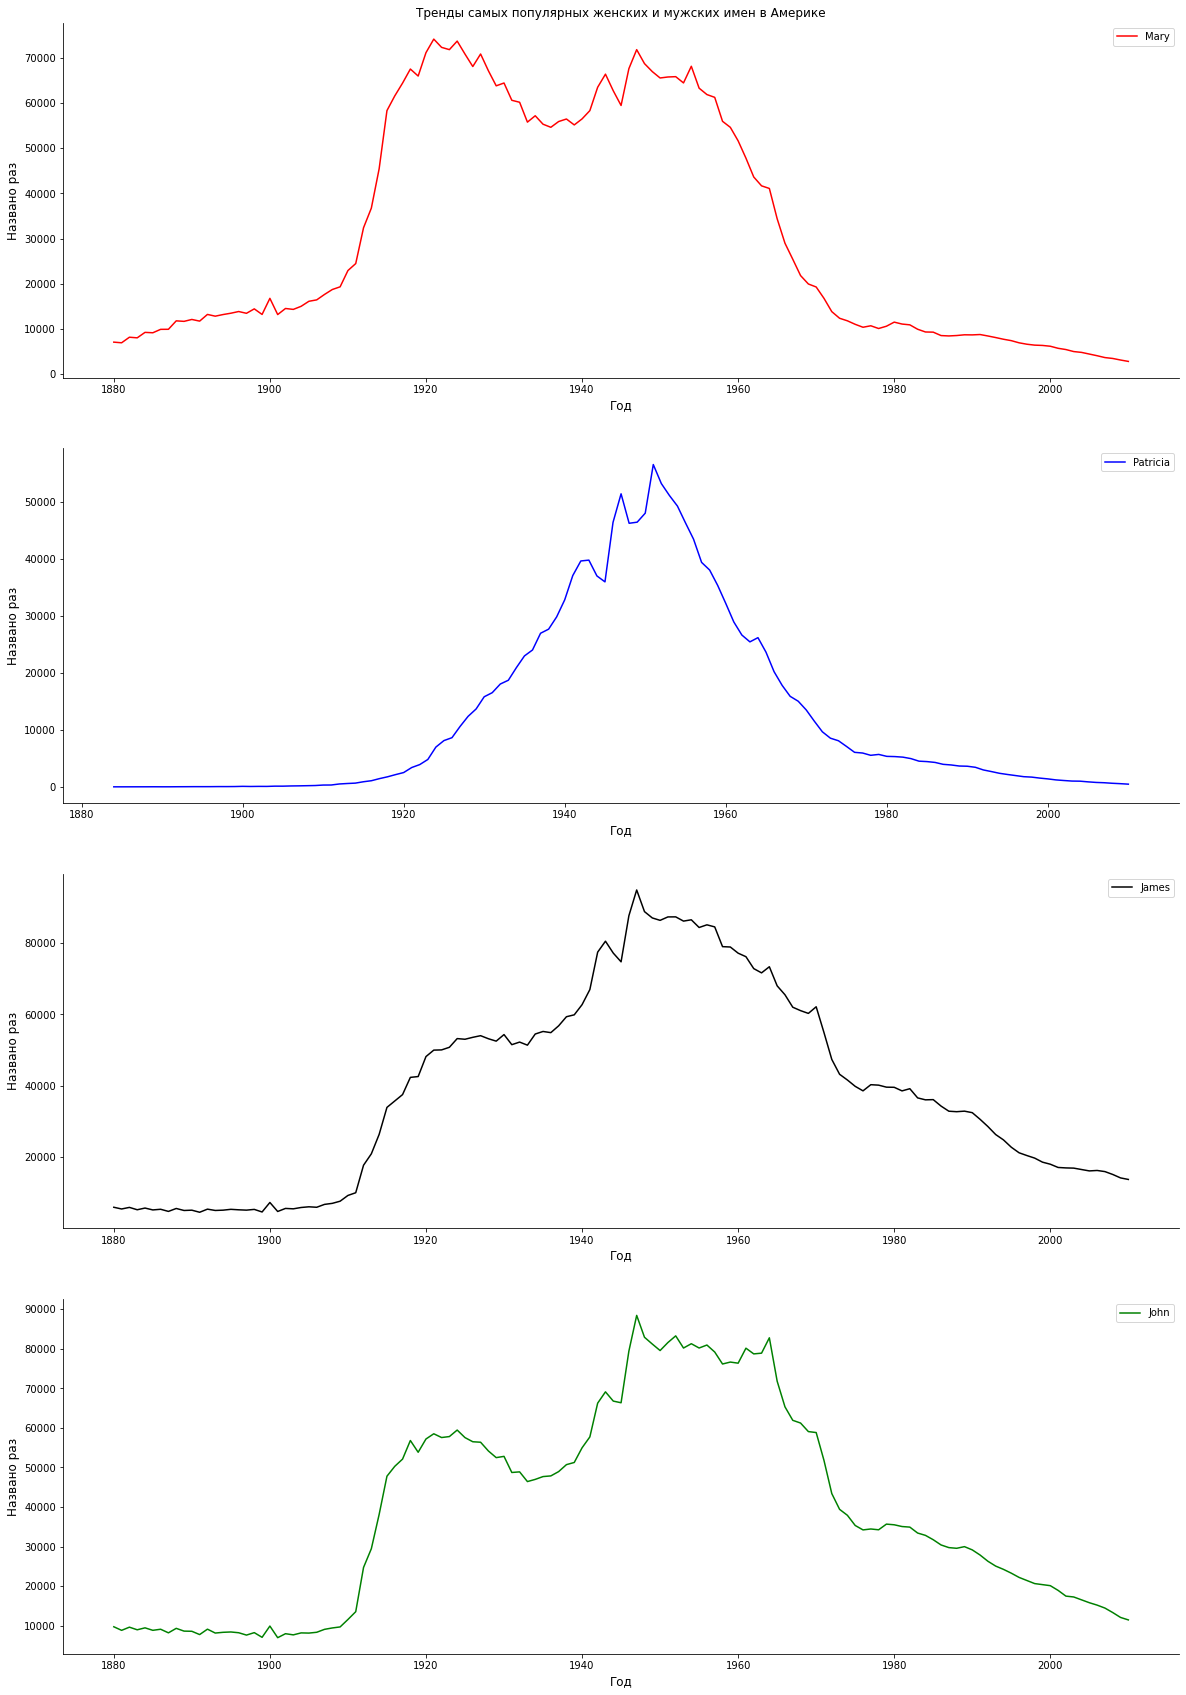

In [127]:
fig, ax = plt.subplots(4,1, figsize=(20,30))
ax[0].set_title('Тренды самых популярных женских и мужских имен в Америке')

for x in range(4):
    ax[x].set_xlabel('Год', fontsize = 12)
    ax[x].set_ylabel('Названо раз', fontsize=12)
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    
ax[0].plot(babies_mary.index, babies_mary.number, c='red')
ax[0].legend(['Mary'])
ax[1].plot(babies_patricia.index, babies_patricia.number, c='blue')
ax[1].legend(['Patricia'])
ax[2].plot(babies_james.index, babies_james.number, c='black')
ax[2].legend(['James'])
ax[3].plot(babies_john.index, babies_john.number, c='green')
ax[3].legend(['John'])

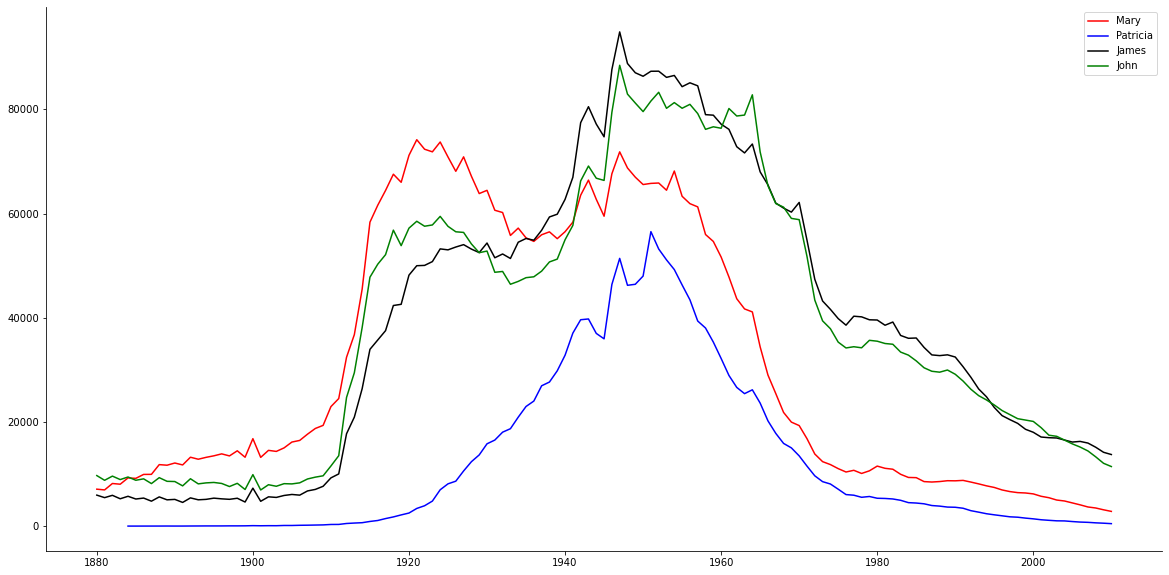

In [42]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot(babies_mary.index, babies_mary.number, c='red')
ax.plot(babies_patricia.index, babies_patricia.number, c='blue')
ax.plot(babies_james.index, babies_james.number, c='black')
ax.plot(babies_john.index, babies_john.number, c='green')
ax.legend(["Mary", "Patricia", 'James', 'John'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

В целом самые популярные в Америке имена за наблюдаемые период времени имеют схожую тенеденцию во времени: резкий рост популярности к 1920 году, и снижение популярности после 1970-х гг. 

В настоящий момент все эти имена имеют низкую популярность. 

За весь период популярность мужских имен больше чем популярность женских имен. Могу предположить, что это связано с большей диверсификацией женских имен, уникальности имени девочек уделяется большее внимание.

Самым популярных из лидером является имя Джеймс, а наименее популярным - имя Патриция.

Общая тенденция провалов популярности имен в годы Великой Депрессии и стремительный подъем с момента Второй Мировой войны в целом затронул и самые популярные имена. Есть предположение, что снижение популярности наших имен связано со сменой ведущего поколония (военное поколоение уступило лидерство послевоенныому, с их сексуальной революцией, сменой ценностей и т.д.) 

## Задание 4

1. В оригинальном датафрейме babies создайте новую колонку - первая буква имени.
2. Выберете год из датасета. Сгруппируйте датасет, чтобы в нем в рядах были первые буквы, а в колонках - количество детей с такими именами. Сохраните три новых датафрейма для любых трех лет из выборки с такой группировкой.
3. Создайте фигуру matplotlib с 3 горизонтальными графиками один под другим.
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. Постройте столбчатую диаграмму для каждого года. 
6. Сделайте вывод - какие первые буквы имени были самыми популярными в каждом году.

In [41]:
babies.head()

,Unnamed: 0,name,sex,number,year
0,0,Mary,F,7065,1880
1,1,Anna,F,2604,1880
2,2,Emma,F,2003,1880
3,3,Elizabeth,F,1939,1880
4,4,Minnie,F,1746,1880


In [46]:
babies['first_letter'] = [x[0] for x in babies['name']]
babies.head()

,Unnamed: 0,name,sex,number,year,first_letter
0,0,Mary,F,7065,1880,M
1,1,Anna,F,2604,1880,A
2,2,Emma,F,2003,1880,E
3,3,Elizabeth,F,1939,1880,E
4,4,Minnie,F,1746,1880,M


In [196]:
first_1979 = babies[babies['year'] == 1979].drop(['Unnamed: 0', 'sex', 'year', 'name'], axis = 1).groupby('first_letter').agg('number').sum()
first_1985 = babies[babies['year'] == 1985].drop(['Unnamed: 0', 'sex', 'year', 'name'], axis = 1).groupby('first_letter').agg('number').sum()
first_2008 = babies[babies['year'] == 2008].drop(['Unnamed: 0', 'sex', 'year', 'name'], axis = 1).groupby('first_letter').agg('number').sum()
first_1979

first_letter
A    309091
B    153571
C    273029
D    203995
E    124555
F     24898
G     57180
H     52800
I     14090
J    544960
K    197352
L    149616
M    331147
N     94958
O      9092
P     59526
Q      3285
R    202982
S    246600
T    179287
U       831
V     29277
W     48283
X       493
Y      7363
Z      7108
Name: number, dtype: int64

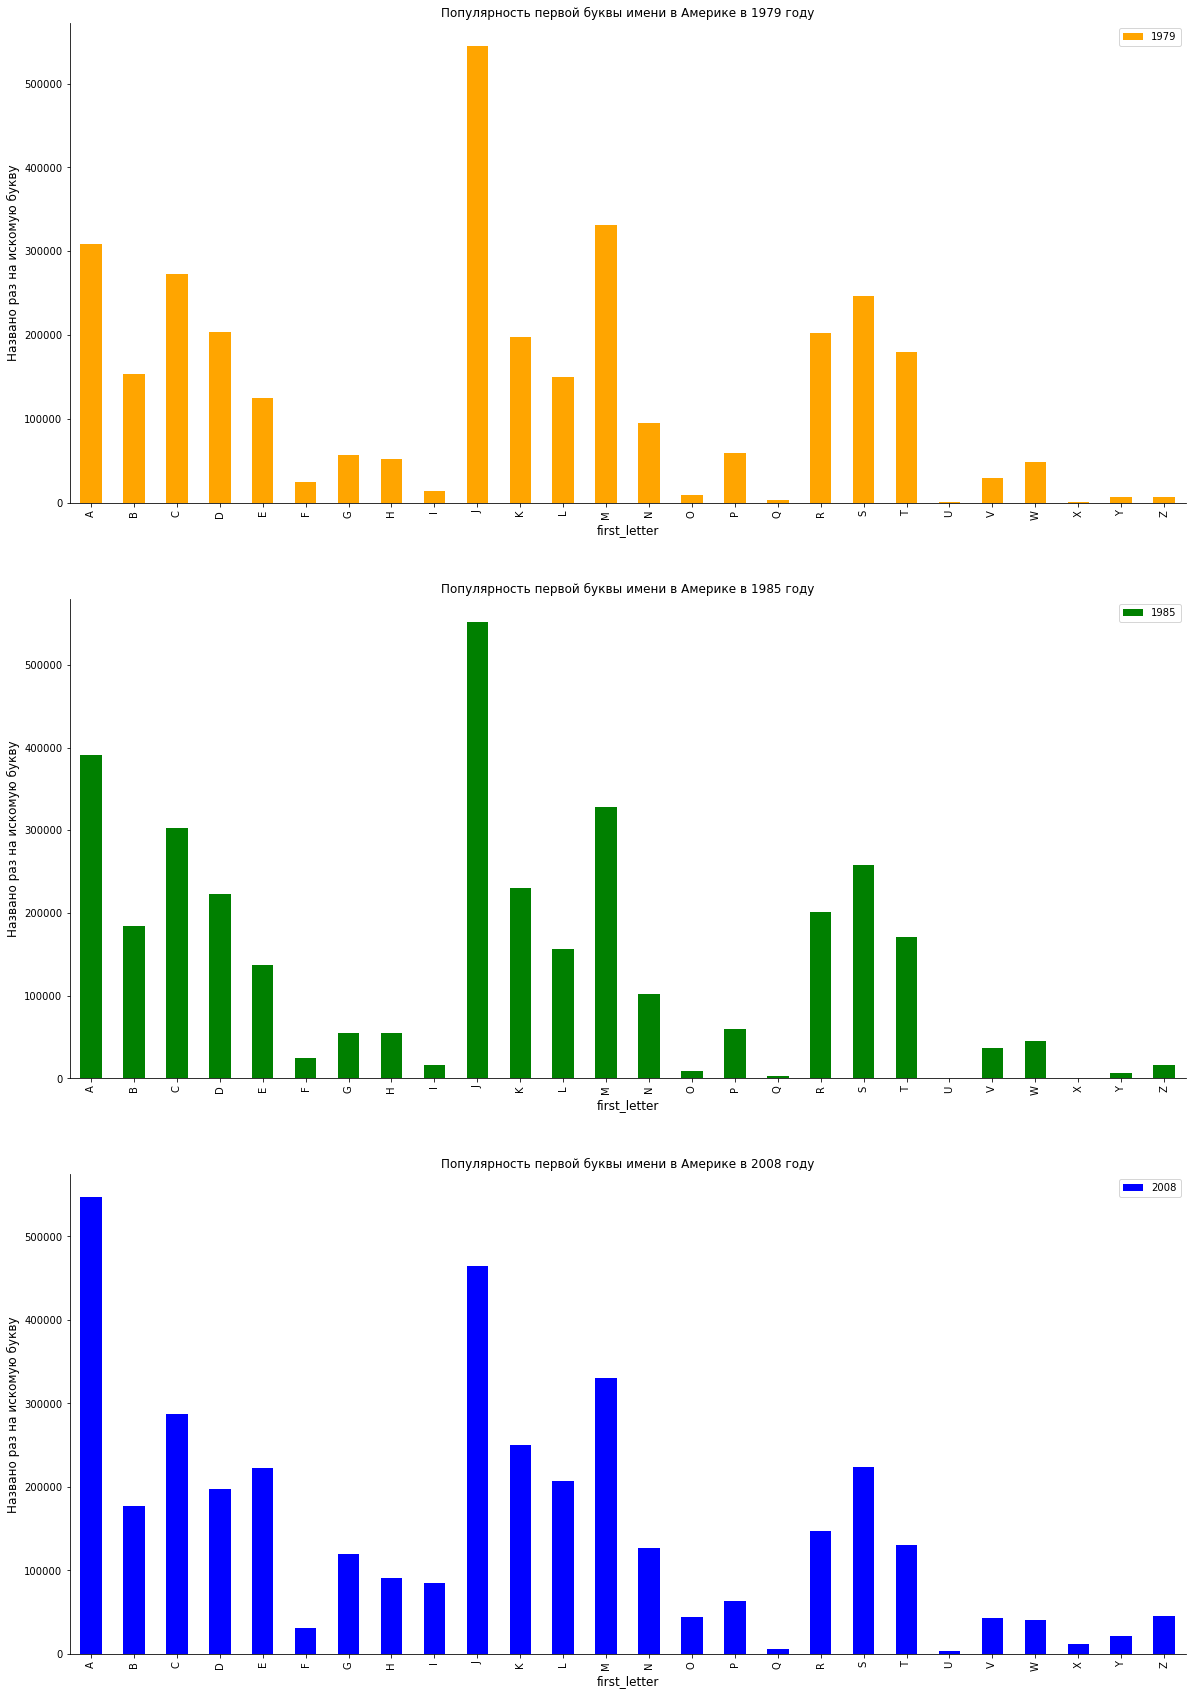

In [197]:
fig, ax = plt.subplots(3,1, figsize=(20,30))

for x in range(3):
    ax[x].set_xlabel('Буквы', fontsize = 12)
    ax[x].set_ylabel('Названо раз на искомую букву', fontsize=12)
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)

first_1979.plot(kind='bar', ax=ax[0], color = 'orange')
ax[0].set_title('Популярность первой буквы имени в Америке в 1979 году')
ax[0].legend(['1979'])

first_1985.plot(kind='bar', ax=ax[1], color = 'green')
ax[1].set_title('Популярность первой буквы имени в Америке в 1985 году')
ax[1].legend(['1985'])

first_2008.plot(kind='bar', ax=ax[2], color = 'blue')
ax[2].set_title('Популярность первой буквы имени в Америке в 2008 году')
ax[2].legend(['2008'])

И в 1979, и в 1985, самой популярной первой буквой имени являлась буква J, в 2008 - буква A.
Чтобы назвать ребенка оригинально, достаточно назвать его на Q, X, W или Z.

## Задание 5

1. Создайте фигуру matplotlib с двумя осями координат (1 ряд, две колонки)
2. В первой оси координат для датасета pima постройте мультивариативный график рассеяния. Шкала x - уровень глюкозы, шкала y - давление, размер - возраст, цвет - наличие диабета (Class). 
3. Во второй оси координат постройте мультивариативный график, где по x - количество беременностей, y - BMI, цвет - наличие диабета. У этого графика принудительно приведите значения шкалы x к дискретным (с помощью метода оси координат, смотрели такой для леса).
4. Верхняя и правая границы графиков должны быть невидимы, каждый график быть с заголовком, шкалы графиков должны быть подписаны.
5. По графикам вывод как эти переменные могут быть связаны с зависимой переменной (класс).


In [96]:
pima['Glucose'] = pima['Glucose'].fillna(value=pima['Glucose'].median())
pima['BloodPressure'] = pima['BloodPressure'].fillna(value=pima['BloodPressure'].median())
pima['SkinThickness'] = pima['SkinThickness'].fillna(value=pima['SkinThickness'].median())
pima['Insulin'] = pima['Insulin'].fillna(value=pima['Insulin'].median())
pima['BMI'] = pima['BMI'].fillna(value=pima['BMI'].mean())
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,125.0,33.600000,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.600000,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.300000,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.100000,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.100000,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.600000,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.000000,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.300000,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.500000,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.457464,0.232,54,1


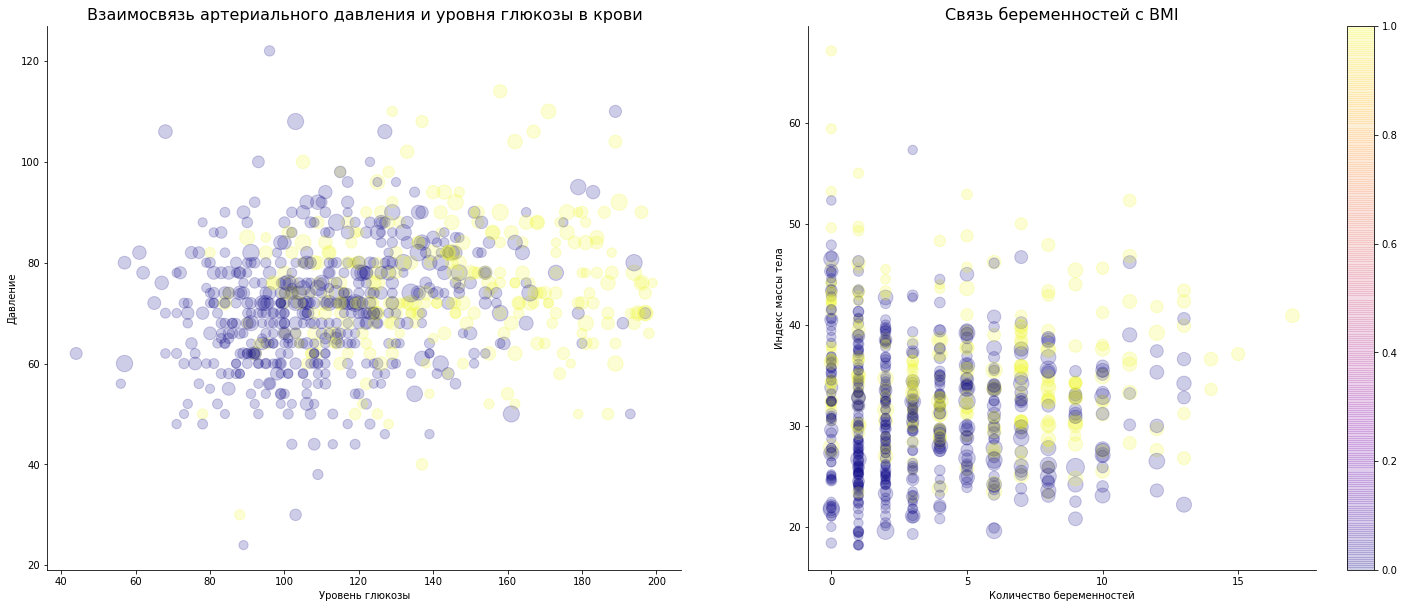

In [201]:
fig, ax = plt.subplots(1,2, figsize=(25,10))

for x in range(2):
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)

ax[0].set_title('Взаимосвязь артериального давления и уровня глюкозы в крови', fontsize=16)
ax[0].set_xlabel('Уровень глюкозы', fontsize=10)
ax[0].set_ylabel('Давление', fontsize=10)

ax[1].set_title('Связь беременностей с BMI', fontsize=16)
ax[1].set_xlabel('Количество беременностей', fontsize=10)
ax[1].set_ylabel('Индекс массы тела', fontsize=10)

color_graph_1 = ax[0].scatter(pima['Glucose'], pima['BloodPressure'], s = pima['Age']*4, alpha = 0.2, cmap = 'plasma', c=pima['Class'])
color_graph_2 = ax[1].scatter(pima['Pregnancies'], pima['BMI'], s = pima['Age']*4, alpha = 0.2, cmap = 'plasma', c=pima['Class'])
ax[1].locator_params(integer=True)
plt.colorbar(color_graph_2) #оставляем одну шкалу с цветовой легендой, т.к. она одинакова для обоих графиков


По первому графику: есть ощущение, что наличие диабета прямо пропорционально уровню глюкозы в крови, но слабо коррелирует с уровнем артериального давления

По второму: наличие диабета слабо связано с количеством детей. Корелляция есть (всё же вероятность наличия диабета у женщины, которая родила больше 3 детей имеется). Но, кажется, диабет связан в этом случае скорее с возврастом, нежели чем с количеством беременностей, так как как правильно большее количество детей означает, что женщина скорее более стара и принадлежит к поколонию с традиционными ценностями. 

При этом более явная корреляция диабетчика в более высоким индексом массы тела. В случае, если BMI находится на уровне ниже 25, то риск заболевания существенно ниже чем у тех, кто имеет более высокий вес тела. 

## Дополнительное задание

1. Создайте на основе датасета pima новый датасет: ряды - количество беременностей, колонки: mean_glucose (средний показатель уровня глюкозы для каждого количества беременностей), mean_bmi (аналогично для BMI). 
2. Создайте фигуру matplotlib с одним объектом.
2. Постройте для этого датасета совмещенную столбчатую диаграмму (для каждого значения переменной Pregnancies должно быть две колонки - mean_glucose, mean_bmi.
3. Верхняя и правая границы графика должны быть невидимы, график должен быть с заголовком, шкалы графика должны быть подписаны.
4. Сделайте вывод о связи количества беременностей и средних уровней глюкозы и индекса массы тела.

In [134]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [151]:
# ds1 = pima.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Class'], axis = 1)
ds2 = pima.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age', 'Class'], axis = 1).groupby('Pregnancies').mean()
ds2.columns = ['mean_glucose', 'mean_bmi']
ds2

,mean_glucose,mean_bmi
Pregnancies,,
0,123.000000,35.167319
1,115.348148,31.372593
2,110.796117,31.213737
3,123.586667,30.858100
4,125.117647,32.141176
5,120.912281,33.762412
6,123.140000,30.939149
7,136.444444,33.352388
8,131.736842,32.422565


Text(0, 0.5, 'Средние Глюкоза/BMI')

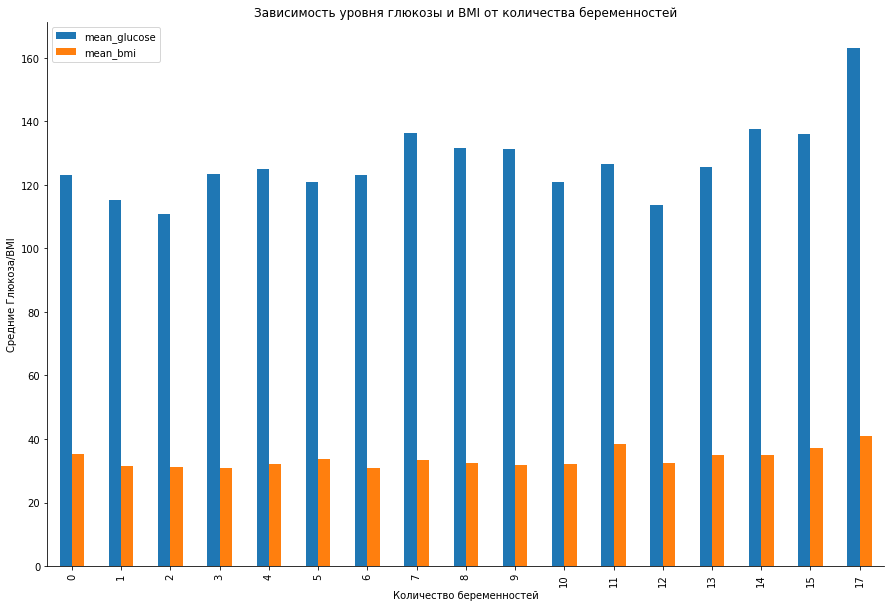

In [173]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
ds2.plot(kind='bar', ax=ax)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('Зависимость уровня глюкозы и BMI от количества беременностей')
ax.set_xlabel('Количество беременностей', fontsize=10)
ax.set_ylabel('Средние Глюкоза/BMI', fontsize=10)

Я не вижу сильной связи между количеством беременностей и уроню глюкозы и размеру индекса массы тела.
Что и логично: вряд ли люди рожают, основываясь на свои физиологические характеристики.